## K Nearest Neighbours: Work best with datasets having <2000 datapoints(smaller datasets)
    1. Determine the value of k using elbow method or hyperparameter tuning with Grid Search CV.
    2. Plot the eblow curve, finalise the value of k
    3.Build the model
    4.Evaluate using respective metrics

## Business Usecase: Build a model that can prescribe Drug to the patient on basis of their gender, medical history.

In [34]:
from warnings import filterwarnings
filterwarnings('ignore')

## Data Gathering

In [1]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [3]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop_duplicates()

## Separate X and Y features
    Y: Drug
    X: Remaining all others features

In [8]:
X = df.drop(columns='Drug')
Y = df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


## Data Preprocessing and Data Cleaning 

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [ ]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [14]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [15]:
pre = ColumnTransformer([
    ('con',con_pipe,con),
    ('cat',cat_pipe,cat)
]).set_output(transform='pandas')

In [16]:
pre

,transformers,"[('con', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Spliting the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)

In [21]:
print(f'xtrain:{xtrain.shape}, xtest:{xtest.shape},ytrain:{ytrain.shape},ytest:{ytest.shape}')

xtrain:(150, 9), xtest:(50, 9),ytrain:(150, 1),ytest:(50, 1)


## KNN Model Building

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain,ytrain)

g:\Machine Learning\ML1418\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
model.score(xtrain,ytrain)

0.9133333333333333

In [25]:
model.score(xtest,ytest)

0.8

## Evaluation of model

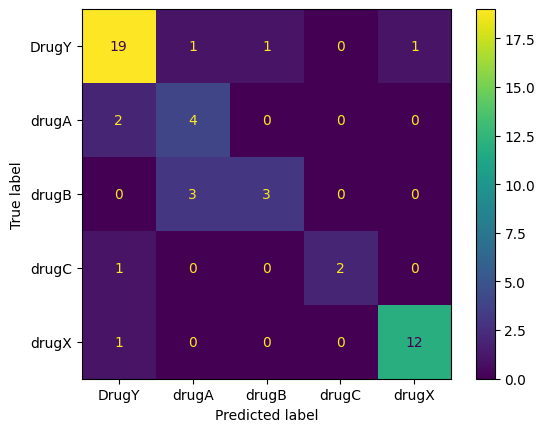

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [27]:
print(classification_report(ytest,y_pred=model.predict(xtest)))

              precision    recall  f1-score   support

       DrugY       0.83      0.86      0.84        22
       drugA       0.50      0.67      0.57         6
       drugB       0.75      0.50      0.60         6
       drugC       1.00      0.67      0.80         3
       drugX       0.92      0.92      0.92        13

    accuracy                           0.80        50
   macro avg       0.80      0.72      0.75        50
weighted avg       0.81      0.80      0.80        50



## Hyperparameter tuning: GridsearchCV/RandomisedSearch CV

In [28]:
params = {
    'n_neighbors':[2,3,4,5,6,7,8,9,10]
}

In [35]:
from sklearn.model_selection import GridSearchCV
base_model = KNeighborsClassifier()
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=3,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [2, 3, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [30]:
gscv.best_params_

{'n_neighbors': 7}

In [31]:
best_knn = gscv.best_estimator_
best_knn.score(xtrain,ytrain)

0.8933333333333333

In [32]:
best_knn.score(xtest,ytest)

0.76

## Elbow Method

In [36]:
import numpy as np
error_rate = []
# For different values of K, Lets calculate the error rate
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest['Drug']))

In [37]:
pred_i

array(['drugA', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugX',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'drugX',
       'drugC', 'DrugY', 'DrugY', 'drugB', 'drugA', 'DrugY', 'drugX',
       'DrugY', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugA', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugX'], dtype=object)

In [38]:
ytest['Drug']

144    drugA
9      DrugY
17     drugA
20     DrugY
45     drugX
6      DrugY
52     DrugY
91     DrugY
129    drugX
183    DrugY
21     DrugY
42     DrugY
105    drugX
145    drugX
87     DrugY
152    drugX
124    drugB
92     DrugY
101    drugA
13     DrugY
108    drugB
75     DrugY
40     DrugY
198    drugX
191    drugA
192    DrugY
194    DrugY
117    drugX
2      drugC
131    DrugY
19     DrugY
143    DrugY
147    drugA
22     DrugY
102    drugC
60     DrugY
136    drugB
168    DrugY
138    drugB
54     drugB
176    drugA
111    drugX
114    drugX
14     drugX
106    drugX
85     drugB
167    drugX
195    drugC
26     DrugY
135    drugX
Name: Drug, dtype: object

## Plot the elbow curve

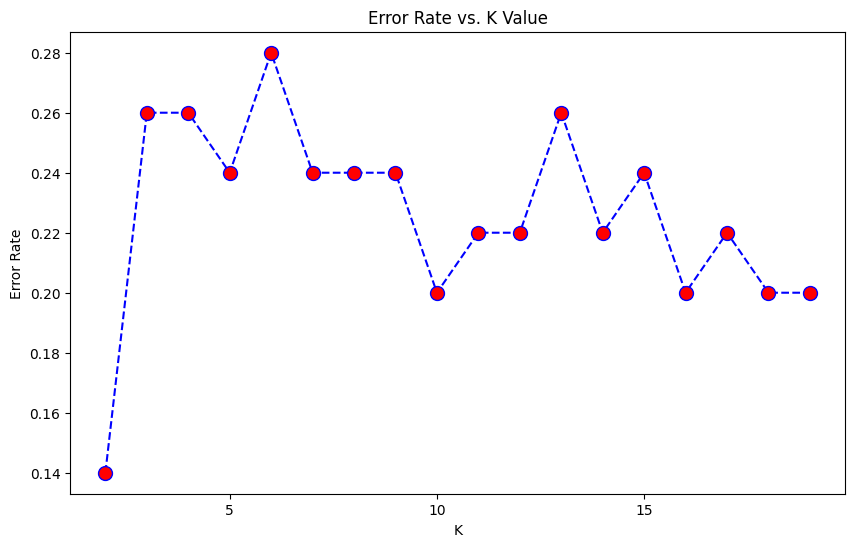

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(2,20),error_rate,color='blue',linestyle='dashed',marker='o',
markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.locator_params(integer=True)

In [40]:
best_knn2 = KNeighborsClassifier(n_neighbors=10)
best_knn2.fit(xtrain,ytrain)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
best_knn2.score(xtrain,ytrain)

0.9133333333333333

In [42]:
best_knn2.score(xtest,ytest)

0.8

In [43]:
best_knn3 = KNeighborsClassifier(n_neighbors=16)
best_knn3.fit(xtrain,ytrain)

,n_neighbors,16
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
best_knn3.score(xtrain,ytrain)

0.9133333333333333

In [46]:
best_knn3.score(xtest,ytest)

0.8

## We can Consider model for final predications

## Out of sample data: future data being provided by client. Client wants you to generate the predictions and return the results in a csv file

In [47]:
path2 =  r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv'
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [ ]:
xnew_pre = pre.transform(xnew)
# Using finalsed model to predict the final drugs to be prescribed
Drug_predicted = best_knn2.predict(xnew_pre)
# Adding the predictions to Xnew data
xnew['Drug Predicted'] = Drug_predicted
# Save the xnew results into a csv file
xnew.to_csv('Drug Results.csv',index=False) 